In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:

data = pd.read_csv('emotions_2.csv')
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.60,26.3,1.0700,0.411,-15.70,2.060,3.150,...,23.50,20.3,20.3,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.80,22.8,6.5500,1.680,2.88,3.830,-4.820,...,-23.30,-21.8,-21.8,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.70,23.7,79.9000,3.360,90.20,89.900,2.030,...,462.00,-233.0,-233.0,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.80,24.3,-0.5840,-0.284,8.82,2.300,-1.970,...,299.00,-243.0,-243.0,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.30,24.5,34.8000,-5.790,3.06,41.400,5.520,...,12.00,38.1,38.1,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,27.90,29.9,31.2,27.40,25.8,-1.6100,0.134,1.18,-0.413,-0.181,...,-5.98,45.8,45.8,-5.98,150.0,5.96,14.80,14.80,5.96,NEUTRAL
195,31.40,32.5,32.3,29.60,25.3,2.4700,0.521,6.20,2.370,4.670,...,-1.13,11.6,11.6,-1.13,136.0,-23.00,26.80,26.80,-23.00,NEUTRAL
196,2.75,10.6,22.9,-5.72,24.5,-0.0941,1.530,2.84,1.440,-1.730,...,-13.60,-52.1,-52.1,-13.60,84.2,46.50,-44.00,-44.00,46.50,POSITIVE
197,26.70,30.0,31.1,25.70,22.9,-2.5700,-3.070,-4.37,-2.430,-5.160,...,-31.30,22.9,22.9,-31.30,113.0,-25.40,13.80,13.80,-25.40,NEUTRAL


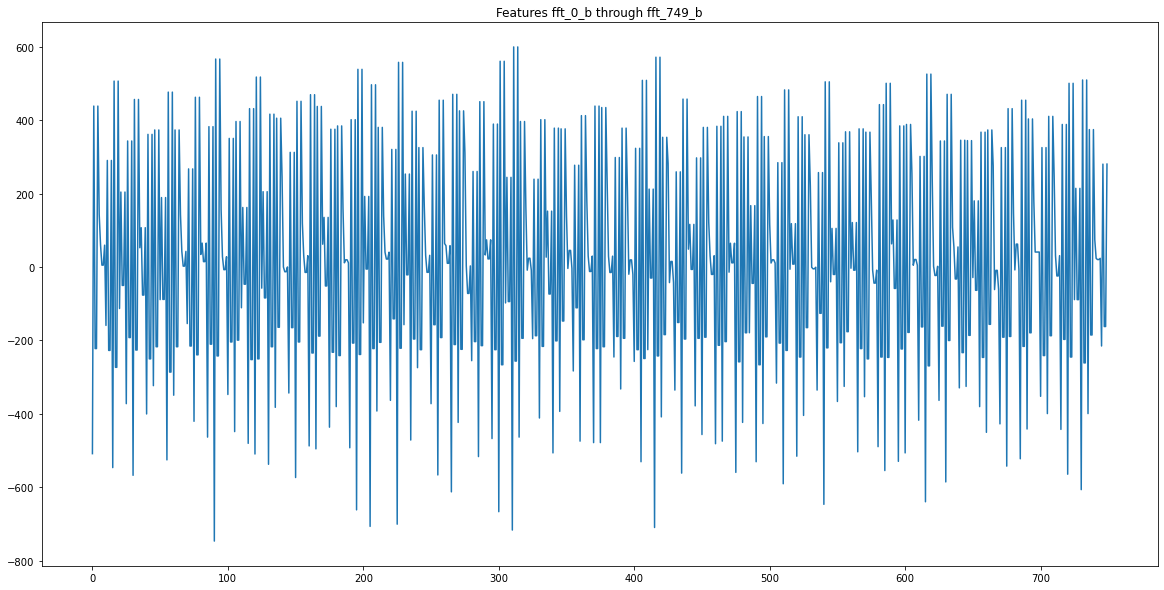

In [4]:

sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(20, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [5]:
df=data.replace(['NEGATIVE','POSITIVE','NEUTRAL'],[-1,1,0])
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.60,26.3,1.0700,0.411,-15.70,2.060,3.150,...,23.50,20.3,20.3,23.50,-215.0,280.00,-162.00,-162.00,280.00,-1
1,28.80,33.1,32.0,25.80,22.8,6.5500,1.680,2.88,3.830,-4.820,...,-23.30,-21.8,-21.8,-23.30,182.0,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.70,23.7,79.9000,3.360,90.20,89.900,2.030,...,462.00,-233.0,-233.0,462.00,-267.0,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.80,24.3,-0.5840,-0.284,8.82,2.300,-1.970,...,299.00,-243.0,-243.0,299.00,132.0,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.30,24.5,34.8000,-5.790,3.06,41.400,5.520,...,12.00,38.1,38.1,12.00,119.0,-17.60,23.90,23.90,-17.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,27.90,29.9,31.2,27.40,25.8,-1.6100,0.134,1.18,-0.413,-0.181,...,-5.98,45.8,45.8,-5.98,150.0,5.96,14.80,14.80,5.96,0
195,31.40,32.5,32.3,29.60,25.3,2.4700,0.521,6.20,2.370,4.670,...,-1.13,11.6,11.6,-1.13,136.0,-23.00,26.80,26.80,-23.00,0
196,2.75,10.6,22.9,-5.72,24.5,-0.0941,1.530,2.84,1.440,-1.730,...,-13.60,-52.1,-52.1,-13.60,84.2,46.50,-44.00,-44.00,46.50,1
197,26.70,30.0,31.1,25.70,22.9,-2.5700,-3.070,-4.37,-2.430,-5.160,...,-31.30,22.9,22.9,-31.30,113.0,-25.40,13.80,13.80,-25.40,0


In [6]:
X=df[['mean_1_a','stddev_1_a','covmat_1_a','eigen_1_a','logm_1_a','entropy1_a','correlate_1_a']]
X.head()

,mean_1_a,stddev_1_a,covmat_1_a,eigen_1_a,logm_1_a,entropy1_a,correlate_1_a
0,30.3,7.80,-4310.0,44200.0,8.37,4.98,20600.0
1,33.1,3.55,-45.9,1160.0,-2.90,5.00,4190.0
2,29.4,4.12,-1800.0,74600.0,5.77,5.00,423000.0
3,31.6,2.99,-848.0,45800.0,5.71,5.01,114000.0
4,31.3,6.99,-74.4,7320.0,-1.99,4.99,9420.0


In [7]:
y=df['label']
y.head()

0   -1
1    0
2    1
3    1
4    0
Name: label, dtype: int64

In [8]:
#X = np.array(X).reshape(-1, 2)
#y = np.array(y).reshape(-1, 1)

In [9]:
y

0     -1
1      0
2      1
3      1
4      0
      ..
194    0
195    0
196    1
197    0
198    1
Name: label, Length: 199, dtype: int64

In [10]:
y = np.array(y).ravel()

In [11]:
y

array([-1,  0,  1,  1,  0,  0,  1, -1,  0, -1,  1, -1,  0, -1,  0, -1,  1,
        0, -1, -1, -1,  0, -1, -1,  1,  0, -1,  0,  1,  1,  1,  0,  0,  1,
        0,  0,  1, -1,  1,  0,  0,  0,  1,  0, -1,  1, -1,  1, -1,  1,  1,
       -1,  1,  0,  1, -1,  0, -1,  1,  0, -1,  0,  1, -1,  0,  1,  0, -1,
        0,  1,  1,  1,  0, -1,  0,  0,  1,  1, -1,  1,  0,  1,  0,  1,  0,
        0,  0,  1,  0,  0,  1, -1, -1,  1,  0, -1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1,  1, -1,  0,  1,  1,  1,  0, -1,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  0,  0,  0,  1,  0, -1, -1,  0, -1,  1,  0, -1,  0, -1,
        1,  1,  0, -1,  1, -1,  1,  0,  1,  1,  1,  1,  1,  0, -1, -1, -1,
        0,  1,  1,  0,  1,  1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1,
        0,  0, -1,  1,  0,  0, -1,  0, -1, -1,  1, -1,  0, -1,  1,  0,  1,
       -1, -1, -1,  0, -1, -1, -1,  0,  0,  1,  0,  1], dtype=int64)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
len(X_train)

159

In [14]:
len(X_test)

40

## Support vector machine (SVM)

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)

In [16]:
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [17]:
score_svm= svm.score(X_test, y_test)

In [18]:
score_svm = svm.score(X_test, y_test)
print('Test accuracy: {:.2f}%'.format(score_svm * 100))

Test accuracy: 80.00%


In [19]:
y_pred_svm = svm.predict(X_test)

In [20]:
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix:')
conf_mat_svm

Confusion matrix:


array([[15,  0,  0],
       [ 0, 10,  1],
       [ 4,  3,  7]], dtype=int64)

In [21]:
label_mapping = {'NEGATIVE': -1, 'NEUTRAL': 0, 'POSITIVE': 1}

In [22]:
clr_svm = classification_report(y_test, y_pred_svm, target_names=label_mapping.keys())

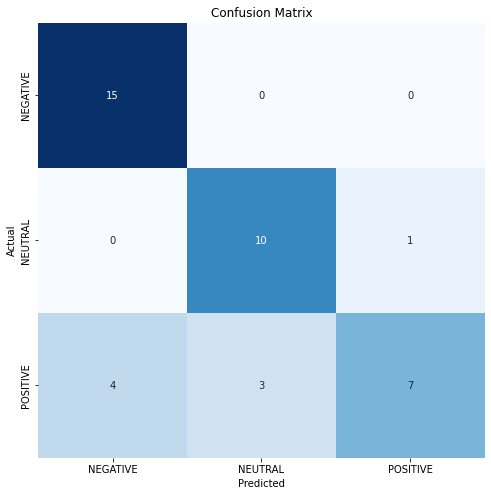

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.79      1.00      0.88        15
     NEUTRAL       0.77      0.91      0.83        11
    POSITIVE       0.88      0.50      0.64        14

    accuracy                           0.80        40
   macro avg       0.81      0.80      0.78        40
weighted avg       0.81      0.80      0.78        40



In [23]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_svm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')

plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr_svm)

In [24]:
test_data = pd.read_excel('test_values_3.xlsx',sheet_name='Sheet2')
test_data.head()

,mean_1_a,stddev_1_a,covmat_1_a,eigen_1_a,logm_1_a,entropy1_a,correlate_1_a
0,30.3,7.80,-4310.0,44200,8.37,4.98,20600
1,33.1,3.55,-45.9,1160,-2.90,5.00,4190
2,29.4,4.12,-1800.0,74600,5.77,5.00,423000
3,31.6,2.99,-848.0,45800,5.71,5.01,114000
4,31.3,6.99,-74.4,7320,-1.99,4.99,9420


In [25]:
feature1=test_data['mean_1_a']
feature2=test_data['stddev_1_a']
feature3=test_data['covmat_1_a']
feature4=test_data['eigen_1_a']
feature5=test_data['logm_1_a']
feature6=test_data['entropy1_a']
feature7=test_data['correlate_1_a']

In [26]:
for t1,t2,t3,t4,t5,t6,t7 in zip(feature1,feature2,feature3,feature4,feature5,feature6,feature7):
    
    input_test_data = (t1,t2,t3,t4,t5,t6,t7)
    input_data_array = np.asarray(input_test_data)
    input_data_array_reshape=input_data_array.reshape(1,-1)
    
    prediction=svm.predict(input_data_array_reshape)
    
    if prediction==0:
        emotion_result="neutral"
    elif prediction==1:
        emotion_result="happy"
    elif prediction==-1:
        emotion_result="sad"
    print("Test data ",input_test_data,"\nThe emotion is ",emotion_result)
    print()


Test data  (30.3, 7.8, -4310.0, 44200, 8.37, 4.98, 20600) 
The emotion is  sad

Test data  (33.1, 3.55, -45.9, 1160, -2.9, 5.0, 4190) 
The emotion is  neutral

Test data  (29.4, 4.12, -1800.0, 74600, 5.77, 5.0, 423000) 
The emotion is  sad

Test data  (31.6, 2.99, -848.0, 45800, 5.71, 5.01, 114000) 
The emotion is  sad

Test data  (31.3, 6.99, -74.4, 7320, -1.99, 4.99, 9420) 
The emotion is  happy

Test data  (30.9, 3.59, -27.4, 1730, -10.7, 5.0, 2660) 
The emotion is  neutral

Test data  (21.0, 3.55, 18.4, 2260, 1.68, 5.0, 3030) 
The emotion is  happy

Test data  (27.8, 5.22, -674.0, 31100, 5.2, 4.99, 149000) 
The emotion is  happy

Test data  (29.7, 4.73, -1.73, 1720, 1.6, 5.0, 4770) 
The emotion is  neutral

Test data  (29.2, 3.93, -4120.0, 33900, 8.73, 5.0, 121000) 
The emotion is  sad

Test data  (28.4, 4.07, -22.0, 841, -3.98, 5.0, 884) 
The emotion is  neutral

Test data  (30.4, 4.02, -1070.0, 18800, 6.01, 5.0, -4080) 
The emotion is  happy

Test data  (32.7, 3.07, 8.5, 851, 1.8

C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with featu

## k-nearest neighbour(knn) 

In [27]:
from sklearn.neighbors import KNeighborsClassifierhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 
knn = KNeighborsClassifier(n_neighbors=7)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
score_knn = knn.score(X_test, y_test)

In [31]:
score_knn = knn.score(X_test, y_test)
print('Test accuracy: {:.2f}%'.format(score_knn * 100))

Test accuracy: 67.50%


In [32]:
y_pred_knn=knn.predict(X_test)

In [33]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion matrix:')
conf_mat_knn

Confusion matrix:


array([[14,  0,  0],
       [ 0,  8,  6],
       [ 4,  3,  5]], dtype=int64)

In [34]:
clr_knn = classification_report(y_test, y_pred_knn, target_names=label_mapping.keys())


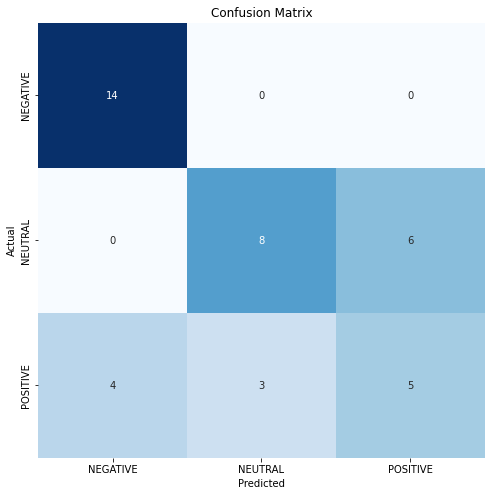

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.78      1.00      0.88        14
     NEUTRAL       0.73      0.57      0.64        14
    POSITIVE       0.45      0.42      0.43        12

    accuracy                           0.68        40
   macro avg       0.65      0.66      0.65        40
weighted avg       0.66      0.68      0.66        40



In [35]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_knn, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')

plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr_knn)

In [36]:
for t1,t2,t3,t4,t5,t6,t7 in zip(feature1,feature2,feature3,feature4,feature5,feature6,feature7):
    
    input_test_data = (t1,t2,t3,t4,t5,t6,t7)
    input_data_array = np.asarray(input_test_data)
    input_data_array_reshape=input_data_array.reshape(1,-1)
    
    prediction=svm.predict(input_data_array_reshape)
    
    if prediction==0:
        emotion_result="neutral"
    elif prediction==1:
        emotion_result="happy"
    elif prediction==-1:
        emotion_result="sad"
    print("Test data ",input_test_data,"\nThe emotion is ",emotion_result)
    print()






Test data  (30.3, 7.8, -4310.0, 44200, 8.37, 4.98, 20600) 
The emotion is  sad

Test data  (33.1, 3.55, -45.9, 1160, -2.9, 5.0, 4190) 
The emotion is  neutral

Test data  (29.4, 4.12, -1800.0, 74600, 5.77, 5.0, 423000) 
The emotion is  sad

Test data  (31.6, 2.99, -848.0, 45800, 5.71, 5.01, 114000) 
The emotion is  sad

Test data  (31.3, 6.99, -74.4, 7320, -1.99, 4.99, 9420) 
The emotion is  happy

Test data  (30.9, 3.59, -27.4, 1730, -10.7, 5.0, 2660) 
The emotion is  neutral

Test data  (21.0, 3.55, 18.4, 2260, 1.68, 5.0, 3030) 
The emotion is  happy

Test data  (27.8, 5.22, -674.0, 31100, 5.2, 4.99, 149000) 
The emotion is  happy

Test data  (29.7, 4.73, -1.73, 1720, 1.6, 5.0, 4770) 
The emotion is  neutral

Test data  (29.2, 3.93, -4120.0, 33900, 8.73, 5.0, 121000) 
The emotion is  sad

Test data  (28.4, 4.07, -22.0, 841, -3.98, 5.0, 884) 
The emotion is  neutral

Test data  (30.4, 4.02, -1070.0, 18800, 6.01, 5.0, -4080) 
The emotion is  happy

Test data  (32.7, 3.07, 8.5, 851, 1.8

C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with featu

# #Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
y_pred_dt = clf_dt.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.00%


In [41]:
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion matrix:')
conf_mat_dt

Confusion matrix:


array([[19,  0,  3],
       [ 0, 15,  4],
       [ 1,  4, 14]], dtype=int64)

In [42]:
clr_dt = classification_report(y_test, y_pred_dt, target_names=label_mapping.keys())


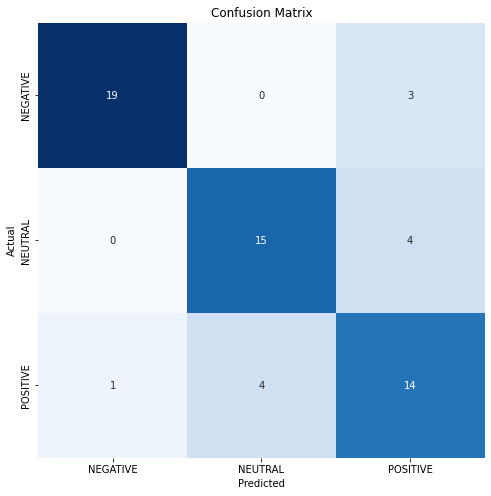

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.95      0.86      0.90        22
     NEUTRAL       0.79      0.79      0.79        19
    POSITIVE       0.67      0.74      0.70        19

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [43]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_dt, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')

plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr_dt)

In [44]:
for t1,t2,t3,t4,t5,t6,t7 in zip(feature1,feature2,feature3,feature4,feature5,feature6,feature7):
    
    input_test_data = (t1,t2,t3,t4,t5,t6,t7)
    input_data_array = np.asarray(input_test_data)
    input_data_array_reshape=input_data_array.reshape(1,-1)
    
    prediction=clf_dt.predict(input_data_array_reshape)
    
    if prediction==0:
        emotion_result="neutral"
    elif prediction==1:
        emotion_result="happy"
    elif prediction==-1:
        emotion_result="sad"
    print("Test data ",input_test_data,"\nThe emotion is ",emotion_result)
    print()

Test data  (30.3, 7.8, -4310.0, 44200, 8.37, 4.98, 20600) 
The emotion is  sad

Test data  (33.1, 3.55, -45.9, 1160, -2.9, 5.0, 4190) 
The emotion is  neutral

Test data  (29.4, 4.12, -1800.0, 74600, 5.77, 5.0, 423000) 
The emotion is  happy

Test data  (31.6, 2.99, -848.0, 45800, 5.71, 5.01, 114000) 
The emotion is  happy

Test data  (31.3, 6.99, -74.4, 7320, -1.99, 4.99, 9420) 
The emotion is  neutral

Test data  (30.9, 3.59, -27.4, 1730, -10.7, 5.0, 2660) 
The emotion is  neutral

Test data  (21.0, 3.55, 18.4, 2260, 1.68, 5.0, 3030) 
The emotion is  happy

Test data  (27.8, 5.22, -674.0, 31100, 5.2, 4.99, 149000) 
The emotion is  sad

Test data  (29.7, 4.73, -1.73, 1720, 1.6, 5.0, 4770) 
The emotion is  neutral

Test data  (29.2, 3.93, -4120.0, 33900, 8.73, 5.0, 121000) 
The emotion is  sad

Test data  (28.4, 4.07, -22.0, 841, -3.98, 5.0, 884) 
The emotion is  happy

Test data  (30.4, 4.02, -1070.0, 18800, 6.01, 5.0, -4080) 
The emotion is  sad

Test data  (32.7, 3.07, 8.5, 851, 1.8

C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklea

## Random forest classification

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(n_estimators=100)

In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred_rfc = rfc.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.67%


In [50]:
conf_mat_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Confusion matrix:')
conf_mat_rfc

Confusion matrix:


array([[19,  0,  3],
       [ 0, 17,  2],
       [ 3,  3, 13]], dtype=int64)

In [51]:
clr_rfc = classification_report(y_test, y_pred_rfc, target_names=label_mapping.keys())


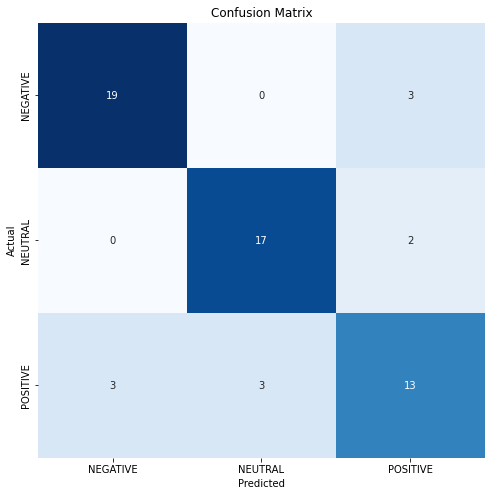

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.86      0.86      0.86        22
     NEUTRAL       0.85      0.89      0.87        19
    POSITIVE       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.81      0.82      0.82        60



In [52]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_rfc, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')

plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr_rfc)

In [53]:
for t1,t2,t3,t4,t5,t6,t7 in zip(feature1,feature2,feature3,feature4,feature5,feature6,feature7):
    
    input_test_data = (t1,t2,t3,t4,t5,t6,t7)
    input_data_array = np.asarray(input_test_data)
    input_data_array_reshape=input_data_array.reshape(1,-1)
    
    prediction=rfc.predict(input_data_array_reshape)
    
    if prediction==0:
        emotion_result="neutral"
    elif prediction==1:
        emotion_result="happy"
    elif prediction==-1:
        emotion_result="sad"
    print("Test data ",input_test_data,"\nThe emotion is ",emotion_result)
    print()

Test data  (30.3, 7.8, -4310.0, 44200, 8.37, 4.98, 20600) 
The emotion is  sad

Test data  (33.1, 3.55, -45.9, 1160, -2.9, 5.0, 4190) 
The emotion is  neutral

Test data  (29.4, 4.12, -1800.0, 74600, 5.77, 5.0, 423000) 
The emotion is  happy

Test data  (31.6, 2.99, -848.0, 45800, 5.71, 5.01, 114000) 
The emotion is  happy

Test data  (31.3, 6.99, -74.4, 7320, -1.99, 4.99, 9420) 
The emotion is  neutral

Test data  (30.9, 3.59, -27.4, 1730, -10.7, 5.0, 2660) 
The emotion is  happy

Test data  (21.0, 3.55, 18.4, 2260, 1.68, 5.0, 3030) 
The emotion is  happy

Test data  (27.8, 5.22, -674.0, 31100, 5.2, 4.99, 149000) 
The emotion is  sad

Test data  (29.7, 4.73, -1.73, 1720, 1.6, 5.0, 4770) 
The emotion is  neutral

Test data  (29.2, 3.93, -4120.0, 33900, 8.73, 5.0, 121000) 
The emotion is  happy

Test data  (28.4, 4.07, -22.0, 841, -3.98, 5.0, 884) 
The emotion is  happy

Test data  (30.4, 4.02, -1070.0, 18800, 6.01, 5.0, -4080) 
The emotion is  sad



C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklea

Test data  (32.7, 3.07, 8.5, 851, 1.89, 5.01, 6030) 
The emotion is  neutral

Test data  (31.7, 6.44, 121.0, 38600, 7.22, 4.99, 50000) 
The emotion is  sad

Test data  (31.8, 3.12, -9.32, 891, 3.35, 5.01, 3650) 
The emotion is  neutral

Test data  (23.8, 5.13, -1670.0, 45500, 1.98, 4.99, 104000) 
The emotion is  sad

Test data  (34.9, 4.6, -120.0, 1760, 3.6, 5.0, 6540) 
The emotion is  neutral

Test data  (30.8, 2.71, 23.5, 945, 1.97, 5.01, 5000) 
The emotion is  neutral

Test data  (21.9, 4.16, -27000.0, 190000, 9.73, 4.99, 970000) 
The emotion is  sad

Test data  (27.6, 7.98, -5460.0, 43000, 9.28, 4.97, 269000) 
The emotion is  sad



C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\RAHUL M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
